# **Hackathon 2 Team 1 Project - Insurance Market Analysis**

# Section 2: Data Visualization

## Objectives

In Section 2, the aim is to anaylsis and present using 3 different plotting tools: Matpotlib, Seaborn and plotly to visualize the anaylsis and proof the hypothesis made. There will be a summary of findings and conclusion in the Section 3.


## Inputs

* 2 cleaned datasets prepared in Section 1 will be used. 
 *  [Insurance_cleaned_orig.csv](../dataset/processed/Insurance_cleaned_orig.csv)   
 *  [Insurance_cleaned_transformed.csv](../dataset/processed/Insurance_cleaned_transfromed.csv)

## Business Requirements Recap

The business requires a predictive model to estimate insurance charges based on customer demographics (age, sex, region) and lifestyle factors (smoker). Since categorical variables cannot be directly used by most models, they must be transformed into numerical format using one-hot encoding. Additionally, visualizations of the encoded features are required to understand category distributions and their impact on charges, enabling data-driven decisions in pricing strategy, risk assessment, and market targeting.

* Customer Segmentation

    * Distribution plot shows how customers are spread across sex, smoker, region.

    * Helps insurers identify under/over-represented groups.

* Risk Assessment

    * Average charges per category plot shows which groups drive higher costs (e.g., smokers have higher charges).

    * Insurers can adjust premiums accordingly.

* Market Strategy

    * Regional distribution can reveal where most insured clients are located.

    * Helps allocate sales and marketing resources effectively.

* Fairness & Compliance

    * By examining how categorical groups differ in charges, insurers can ensure pricing models comply with regulations (avoid discrimination while adjusting for risk).

## Hypothesis and how to validate?

1. 
    * Answer:
2. 
    * Answer:
3. 
    * Answer:
4. 
    * Answer:
5. 
    * Answer:

## Outputs

* Findings with various graphs by Matpotlib, Seaborn and plotly will be demonstrated through this Jupyter Notebook. All the result will be summarized in README.md below.
    * [README.md](../README.md)





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\hackathon\\Hackathon2HealthTeam1\\Hackathon2Team1Project-Health-Insurance-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\hackathon\\Hackathon2HealthTeam1\\Hackathon2Team1Project-Health-Insurance-Analysis'

---

# Part A

# Basic Static Graphs

In [4]:
import numpy as np
import pandas as pd


In [5]:
# Load datasets from csv files
df = pd.read_csv("dataset/processed/Insurance_cleaned_orig.csv")
df_encoded = pd.read_csv("dataset/processed/Insurance_cleaned_transformed.csv")

---

In [6]:
df.head()

,ID,age,sex,bmi,children,smoker,region,charges,bmi_category
0,1,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,2,18,male,33.770,1,no,southeast,1725.55230,obese
2,3,28,male,33.000,3,no,southeast,4449.46200,obese
3,4,33,male,22.705,0,no,northwest,21984.47061,normal
4,5,32,male,28.880,0,no,northwest,3866.85520,overweight


In [7]:
df_encoded.head()

,ID,age,bmi,children,charges,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal,log_charges
0,1,19,27.900,0,16884.92400,1,1,1,0,0,1,0,0,9.734176
1,2,18,33.770,1,1725.55230,0,0,0,1,0,0,1,0,7.453302
2,3,28,33.000,3,4449.46200,0,0,0,1,0,0,1,0,8.400538
3,4,33,22.705,0,21984.47061,0,0,0,0,1,0,0,1,9.998092
4,5,32,28.880,0,3866.85520,0,0,0,0,1,1,0,0,8.260197


**Heatmap for Overviewing the Features Correlation**

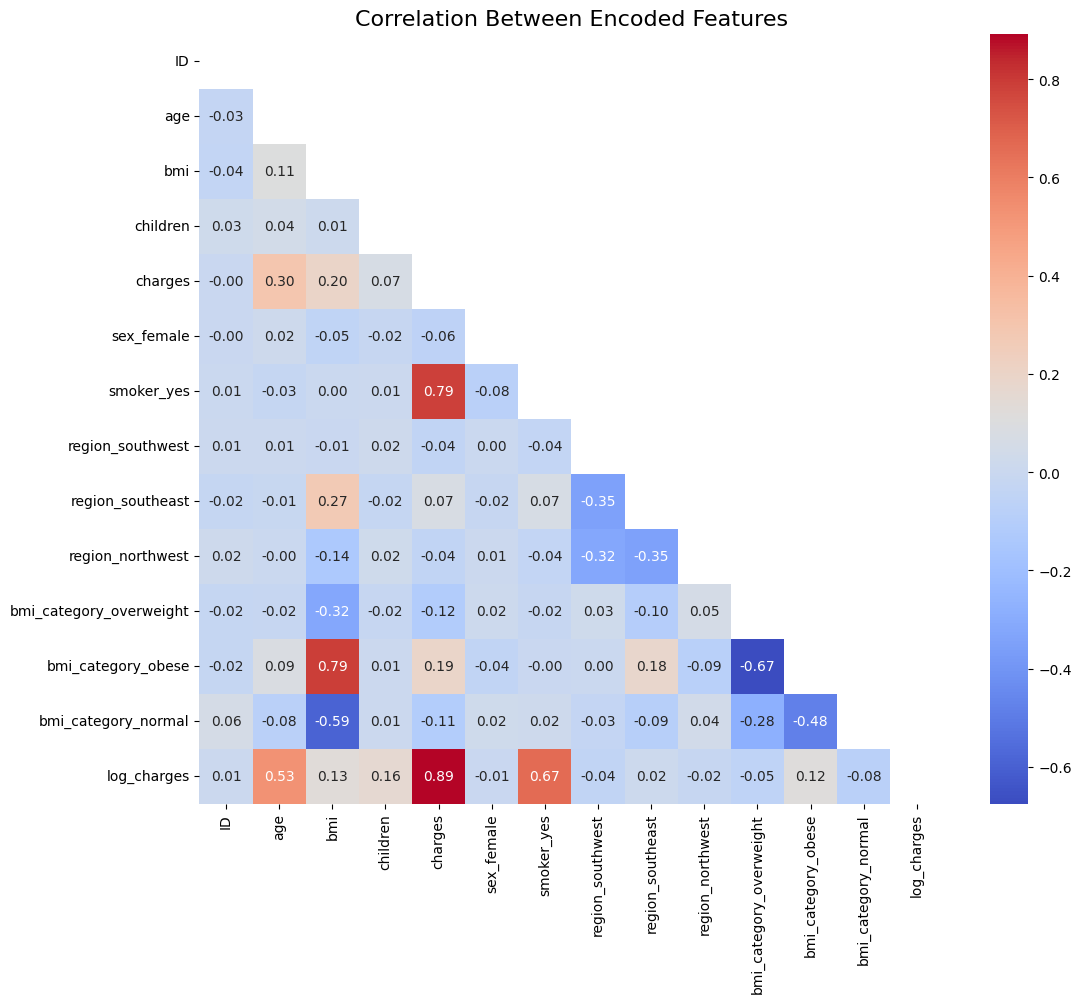

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mask for the upper triangle
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Create a correlation heatmap 
plt.figure(figsize=(12, 10))   # figure size: width=12, height=10 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

plt.title("Correlation Between Encoded Features", fontsize=16)
plt.show()

Findings:
1. The correlation heatmap shows strong relationships between certain encoded features and insurance charges, especially smoker status.
2. The distribution of one-hot encoded categories reveals the spread of customers across sex, smoker, and region groups, highlighting any imbalances in the dataset.


**Bar Plot for Categorical Distribution**

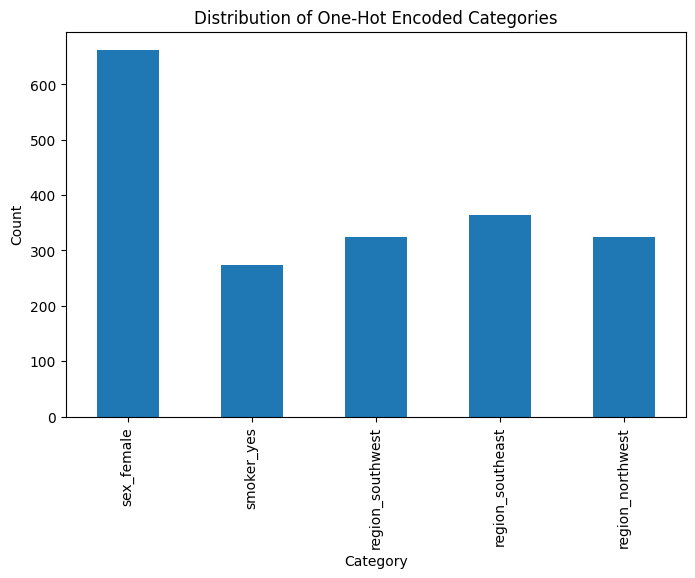

In [9]:
ohe_cols = [col for col in df_encoded.columns if col.startswith(("sex_", "smoker_", "region_"))]

df_encoded[ohe_cols].sum().plot(kind="bar", figsize=(8,5))

plt.title("Distribution of One-Hot Encoded Categories")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

**Stacked Bar Plot (compare vs. target variable)**

*   i. Compare smoker_yes vs. smoker_no against charges bins.
*   ii. Compare sex_female vs. sex_male against charges bins.
*   iii. Compare smoker_yes vs. smoker_no against sex_male bins.

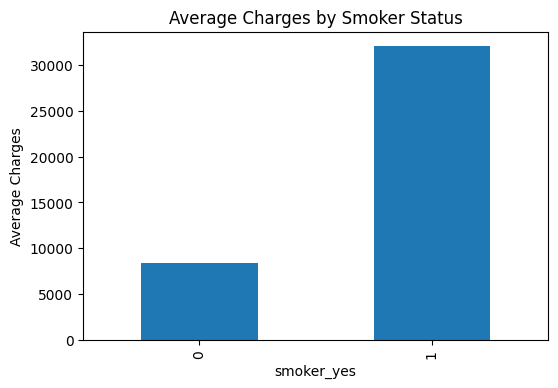

In [10]:
df_grouped = df_encoded.groupby(["smoker_yes"])["charges"].mean()

df_grouped.plot(kind="bar", figsize=(6,4))
plt.title("Average Charges by Smoker Status")
plt.ylabel("Average Charges")
plt.show()

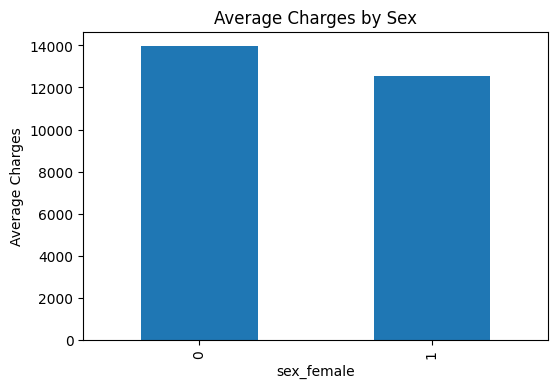

In [11]:
df_grouped = df_encoded.groupby(["sex_female"])["charges"].mean()

df_grouped.plot(kind="bar", figsize=(6,4))
plt.title("Average Charges by Sex")
plt.ylabel("Average Charges")
plt.show()

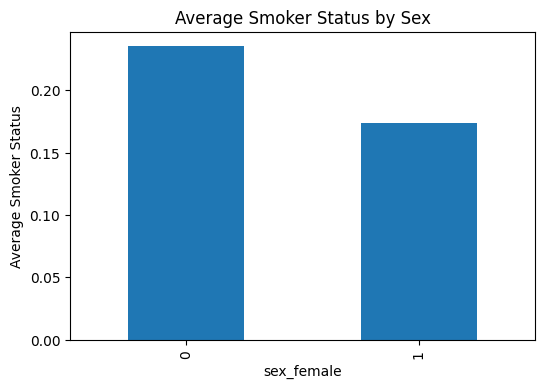

In [12]:
df_grouped = df_encoded.groupby(["sex_female"])["smoker_yes"].mean()

df_grouped.plot(kind="bar", figsize=(6,4))
plt.title("Average Smoker Status by Sex")
plt.ylabel("Average Smoker Status")
plt.show()

Findings:

1. Average charges by smoker status indicate that smokers have significantly higher insurance charges compared to non-smokers.
2. Average charges by sex show some difference, but the impact is less pronounced than smoker status. The difference may be determined by smoking habits, age and other factors like occupation which is not included in our dataset.
3. The average smoker status by sex suggests a possible relationship between gender and smoking habits in the dataset.

**Futher Verification with T-test, ANOVA and Boxplot**

**The following statistical tests are performed to validate the visual insights:**
- **T-test for differences in charges by sex**
- **T-test for differences in charges by smoker status**
- **ANOVA for differences in charges by region**

In [13]:
from scipy.stats import ttest_ind

# Charges by sex
male_charges = df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

t_stat_sex, p_val_sex = ttest_ind(male_charges, female_charges, equal_var=False)

# Charges by smoker status
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

t_stat_smoker, p_val_smoker = ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

print(f"Sex - t-statistic: {t_stat_sex:.2f}, p-value: {p_val_sex:.4f}")
print(f"Smoker - t-statistic: {t_stat_smoker:.2f}, p-value: {p_val_smoker:.4f}")


Sex - t-statistic: 2.10, p-value: 0.0358
Smoker - t-statistic: 32.75, p-value: 0.0000


In [14]:
from scipy.stats import f_oneway

groups = [df[df["region"] == r]["charges"] for r in df["region"].unique()]
f_stat_region, p_val_region = f_oneway(*groups)

print(f"Region - F-statistic: {f_stat_region:.2f}, p-value: {p_val_region:.4f}")

Region - F-statistic: 2.97, p-value: 0.0309


# Boxplots to visualize distributions and outliers

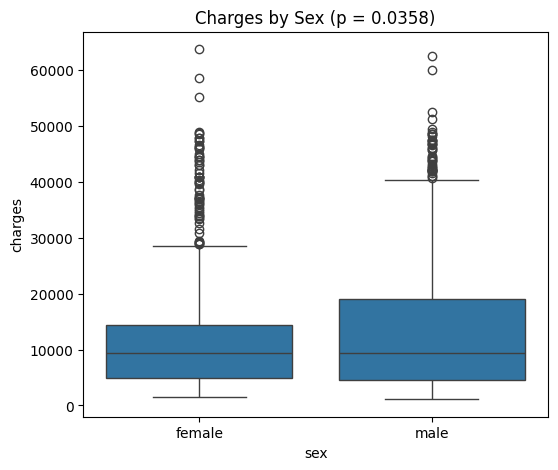

In [15]:
# Plot: charges by sex
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="sex", y="charges")
plt.title(f"Charges by Sex (p = {p_val_sex:.4f})")
plt.show()

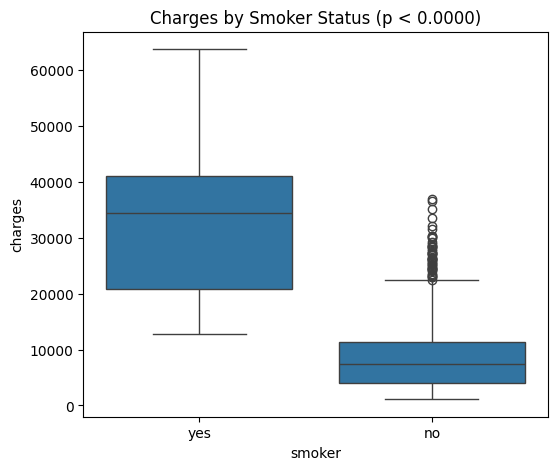

In [16]:
# Plot: charges by smoker status
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title(f"Charges by Smoker Status (p < {p_val_smoker:.4f})")  # usually very small
plt.show()

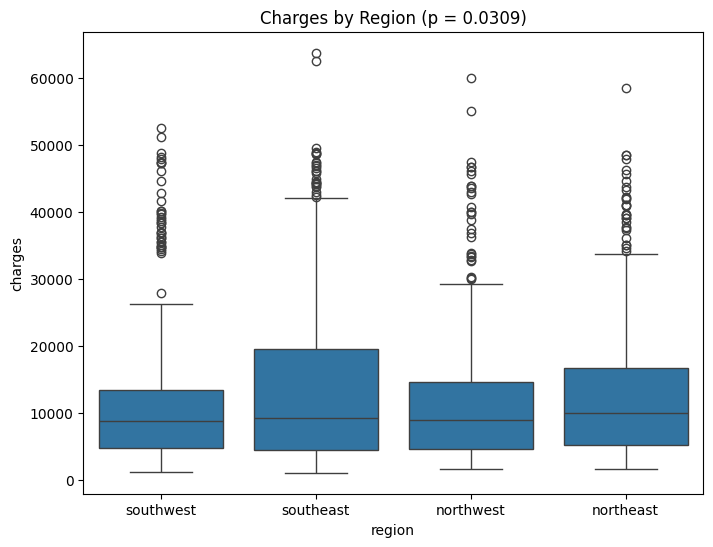

In [17]:
# Plot: charges by region
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="region", y="charges")
plt.title(f"Charges by Region (p = {p_val_region:.4f})")
plt.show()

Findings:

* Sex boxplot: Apparent difference, likely p < 0.05 → modest significant. 
    * Outliers indicate high-cost clients. They can skew the average, which is why median is often more informative. Outliers may be due to smoking, age, or rare medical conditions not captured in sex alone.

* Smoker boxplot: Huge gap, p << 0.001 → highly significant. 
    * Outliers indicate other than smoke status, other factors like health condition or occupation may affect the insurance cost for non-smokers.

* Region boxplot: Moderate variation, ANOVA will show if differences are significant overall. 
    * Outliers can indicate localized high-cost claims or extreme cases in that region which is useful for risk assessment. Regions with many high-charge outliers might need special pricing or underwriting.

Remarks: p-value < 0.05 → statistically significant difference.

**BMI Analysis**

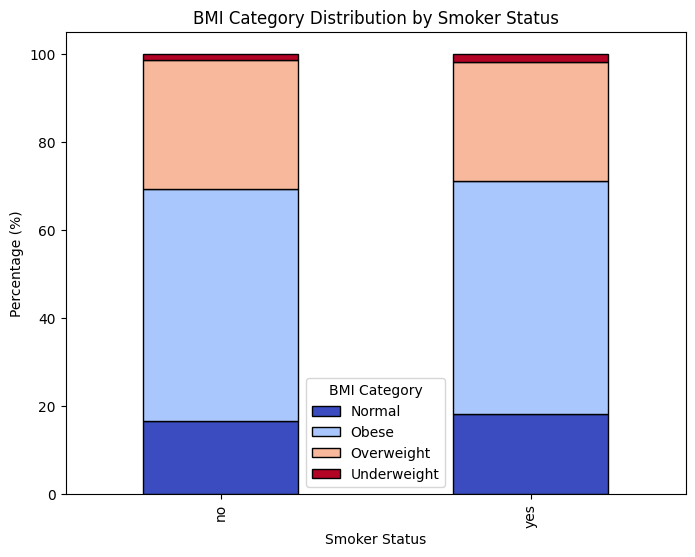

In [18]:


# 1. BMI category function
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["bmi"].apply(bmi_category)

# 2. Count per smoker + BMI group
counts = df.groupby(["smoker", "BMI_Category"]).size().reset_index(name="Count")

# 3. Add percentage within each smoker group
counts["Percentage"] = counts.groupby("smoker")["Count"].transform(lambda x: x / x.sum() * 100)

# 4. Pivot for stacked bar chart
pivot_data = counts.pivot(index="smoker", columns="BMI_Category", values="Percentage").fillna(0)

# 5. Plot
pivot_data.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    colormap="coolwarm",
    edgecolor="black"
)

plt.title("BMI Category Distribution by Smoker Status")
plt.ylabel("Percentage (%)")
plt.xlabel("Smoker Status")
plt.legend(title="BMI Category")
plt.show()

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [19]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


# 1️⃣ Prepare Data
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["bmi"].apply(bmi_category)

# Numeric columns for correlation
numeric_cols = ["age", "bmi", "charges"]
corr_matrix = df[numeric_cols].corr()

# BMI distribution by smoker
bmi_counts = df.groupby(["smoker", "BMI_Category"]).size().reset_index(name="Count")
bmi_counts["Percentage"] = bmi_counts.groupby("smoker")["Count"].transform(lambda x: x / x.sum() * 100)

# 2️⃣ Create Subplots Layout
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "heatmap"}, {"type": "xy"}],
           [{"type": "bar", "colspan": 2}, None]],
    subplot_titles=("Correlation Heatmap", "BMI vs Charges by Smoker", "BMI Distribution by Smoker")
)

# 3️⃣ Add Correlation Heatmap
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale="RdBu_r",
    zmin=-1, zmax=1,
    text=corr_matrix.round(2).values,
    hovertemplate="Correlation: %{text}<br>X: %{x}<br>Y: %{y}<extra></extra>"
)
fig.add_trace(heatmap, row=1, col=1)

# 4️⃣ Add Scatterplot (BMI vs Charges by Smoker)
for smoker_status in df["smoker"].unique():
    subset = df[df["smoker"] == smoker_status]
    fig.add_trace(
        go.Scatter(
            x=subset["bmi"],
            y=subset["charges"],
            mode="markers",
            name=f"Smoker: {smoker_status}",
            text=subset[["age", "region", "sex", "BMI_Category"]].astype(str).agg(", ".join, axis=1),
            hovertemplate="BMI: %{x}<br>Charges: %{y}<br>%{text}<extra></extra>"
        ),
        row=1, col=2
    )

# 5️⃣ Add Stacked Bar: BMI Distribution by Smoker
for bmi_cat in df["BMI_Category"].unique():
    subset = bmi_counts[bmi_counts["BMI_Category"] == bmi_cat]
    fig.add_trace(
        go.Bar(
            x=subset["smoker"],
            y=subset["Percentage"],
            name=bmi_cat,
            text=subset["Percentage"].round(1).astype(str) + "%",
            textposition="auto"
        ),
        row=2, col=1
    )

# 6️⃣ Update Layout
fig.update_layout(
    height=900,
    width=1000,
    title_text="Insurance Data Interactive Dashboard",
    barmode="stack",
    legend_title="BMI Category / Smoker",
)

fig.show()

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [22]:
import os
try:
    # create your folder here
    # os.makedirs(name='')
    pass
except Exception as e:
    print(e)
